In [1]:
import requests


In [2]:
from bs4 import BeautifulSoup

In [4]:
url = 'https://finance.naver.com/item/sise_day.nhn?code=068270&page=1' 
html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text
bs = BeautifulSoup(html, 'lxml')
pgrr = bs.find('td', class_='pgRR')
print(pgrr.a['href'])

/item/sise_day.nhn?code=068270&page=423


In [5]:
print(pgrr.prettify())

<td class="pgRR">
 <a href="/item/sise_day.nhn?code=068270&amp;page=423">
  맨뒤
  <img alt="" border="0" height="5" src="https://ssl.pstatic.net/static/n/cmn/bu_pgarRR.gif" width="8"/>
 </a>
</td>



In [6]:
print(pgrr.text)


맨뒤
				




In [7]:
s = str(pgrr.a['href']).split('=')

In [11]:
s
last_page = s[-1]

In [12]:
import pandas as pd


df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=068270'



In [24]:
for page in range(1, int(last_page)+1):
    url = '{}&page={}'.format(sise_url, page)
    html = requests.get(url, headers={'User-agent' : 'Mozilla/5.0'}).text
    df = df.append(pd.read_html(html, header=0)[0])

df = df.dropna()

/var/folders/50/6fyr8m8d3c11wvj8rtvg06wr0000gn/T/ipykernel_2092/862753939.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(html, header=0)[0])
/var/folders/50/6fyr8m8d3c11wvj8rtvg06wr0000gn/T/ipykernel_2092/862753939.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(html, header=0)[0])
/var/folders/50/6fyr8m8d3c11wvj8rtvg06wr0000gn/T/ipykernel_2092/862753939.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(html, header=0)[0])
/var/folders/50/6fyr8m8d3c11wvj8rtvg06wr0000gn/T/ipykernel_2092/862753939.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

In [25]:
df

,날짜,종가,전일비,시가,고가,저가,거래량
13,2022.07.08,182500.0,5000.0,187000.0,187000.0,178500.0,755595.0
12,2022.07.11,186000.0,3500.0,181500.0,187500.0,181500.0,344098.0
11,2022.07.12,187500.0,1500.0,187500.0,191500.0,185000.0,423296.0
10,2022.07.13,190000.0,2500.0,188500.0,193000.0,187500.0,513629.0
9,2022.07.14,189000.0,1000.0,190000.0,190500.0,186500.0,420165.0
...,...,...,...,...,...,...,...
3,2005.07.25,5650.0,70.0,5500.0,5950.0,5500.0,61036.0
4,2005.07.22,5580.0,160.0,5850.0,5850.0,5530.0,69921.0
5,2005.07.21,5740.0,810.0,6450.0,6580.0,5730.0,182685.0
9,2005.07.20,6550.0,1150.0,7690.0,7690.0,6550.0,422688.0


In [26]:
df = df.iloc[0:300]
df = df.sort_values(by='날짜')

In [27]:
df

,날짜,종가,전일비,시가,고가,저가,거래량
13,2021.07.16,269000.0,2500.0,264500.0,272000.0,262500.0,578040.0
12,2021.07.19,263000.0,6000.0,271500.0,272000.0,263000.0,463187.0
11,2021.07.20,273000.0,10000.0,266500.0,275500.0,266000.0,1113782.0
10,2021.07.21,267500.0,5500.0,276000.0,276000.0,267500.0,525377.0
9,2021.07.22,269500.0,2000.0,269500.0,270000.0,266500.0,299521.0
...,...,...,...,...,...,...,...
3,2022.08.17,212000.0,1000.0,211000.0,214000.0,210000.0,410718.0
2,2022.08.18,202500.0,9500.0,211000.0,211000.0,202000.0,497185.0
2,2022.08.18,202500.0,9500.0,211000.0,211000.0,202000.0,497185.0
1,2022.08.19,201500.0,1000.0,202500.0,205500.0,201000.0,287084.0


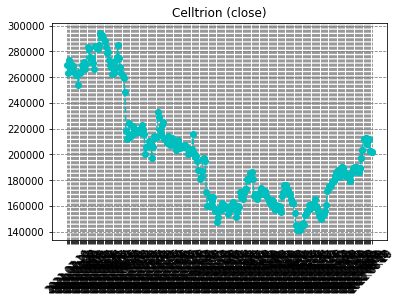

In [28]:
import matplotlib.pyplot as plt

plt.title('Celltrion (close)')
plt.xticks(rotation=45)
plt.plot(df.날짜, df.종가, 'co--')
plt.grid(color='gray', linestyle='--')
plt.show()